In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sys
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [2]:
ın = pd.read_csv('INvideos.csv')

In [3]:
ın.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
ın.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
video_id                  37352 non-null object
trending_date             37352 non-null object
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null object
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.8+ MB


In [5]:
ın.drop(['video_id','publish_time','video_error_or_removed','ratings_disabled','comments_disabled','tags'], axis=1 ,inplace = True)

In [6]:
ın.head()

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,Presenting Sharry Mann latest Punjabi Song Cu...
1,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,This video showcases the difference between pe...
4,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,why Samantha became EMOTIONAL @ Samantha naga ...


In [7]:
ın.tail()

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
37347,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37348,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,"Flowers - A R Rahman Show,Book your Tickets He..."
37349,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,Subscribe to Mazhavil Manorama now for your da...
37350,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,Nuabohu : Story of a rustic village girl who w...
37351,18.14.06,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,24,1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,Check out Ee Nagaraniki Emaindi Trailer #EeNag...


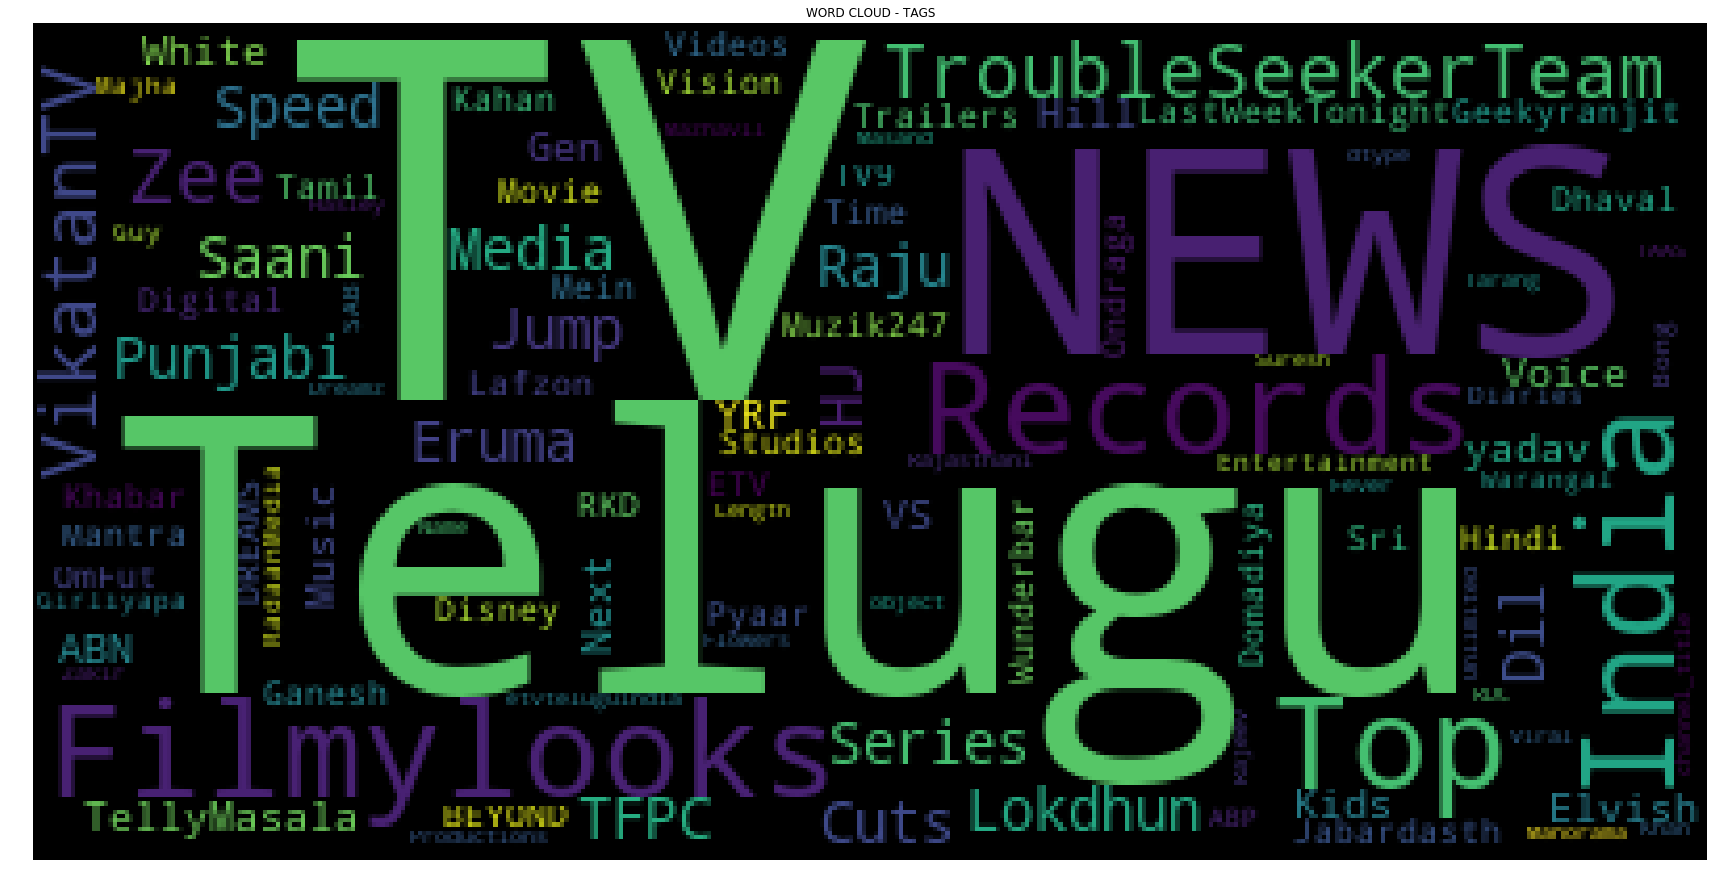

In [8]:
df_youtube = pd.DataFrame(ın)
plt.figure(figsize = (30,30))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['channel_title']))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


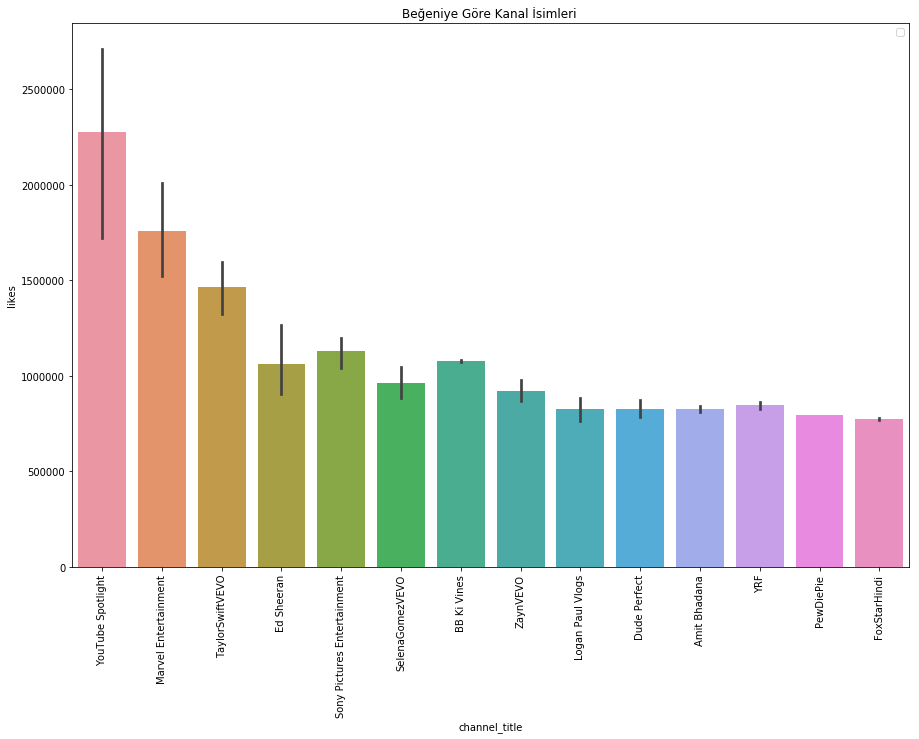

In [9]:
new_index = ın['likes'].sort_values(ascending = False).index.values
sorted_data = ın.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['likes'].head(100),data = sorted_data)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Beğeniye Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


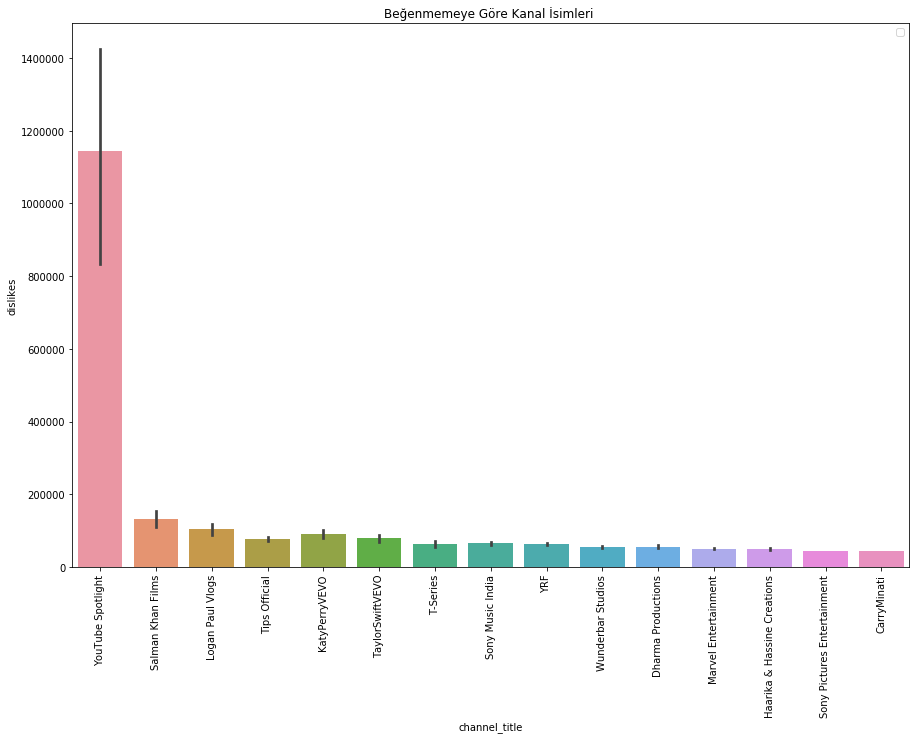

In [10]:
new_index = ın['dislikes'].sort_values(ascending = False).index.values
sorted_data = ın.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['dislikes'].head(100),data = ın)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Beğenmemeye Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


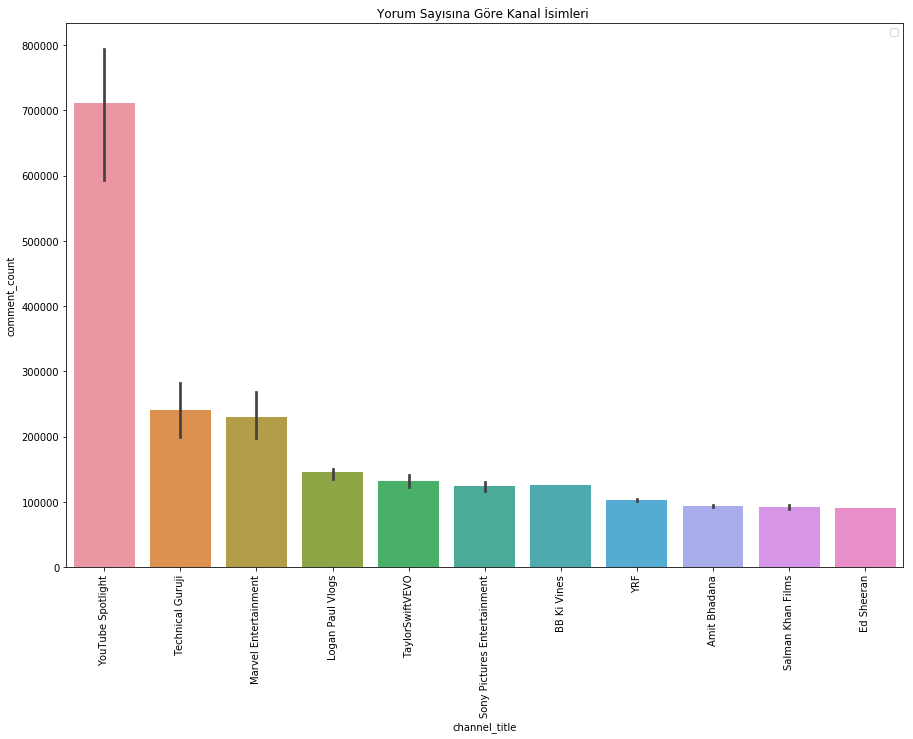

In [11]:
new_index = ın['comment_count'].sort_values(ascending = False).index.values
sorted_data = ın.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['comment_count'].head(100),data = ın)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Yorum Sayısına Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


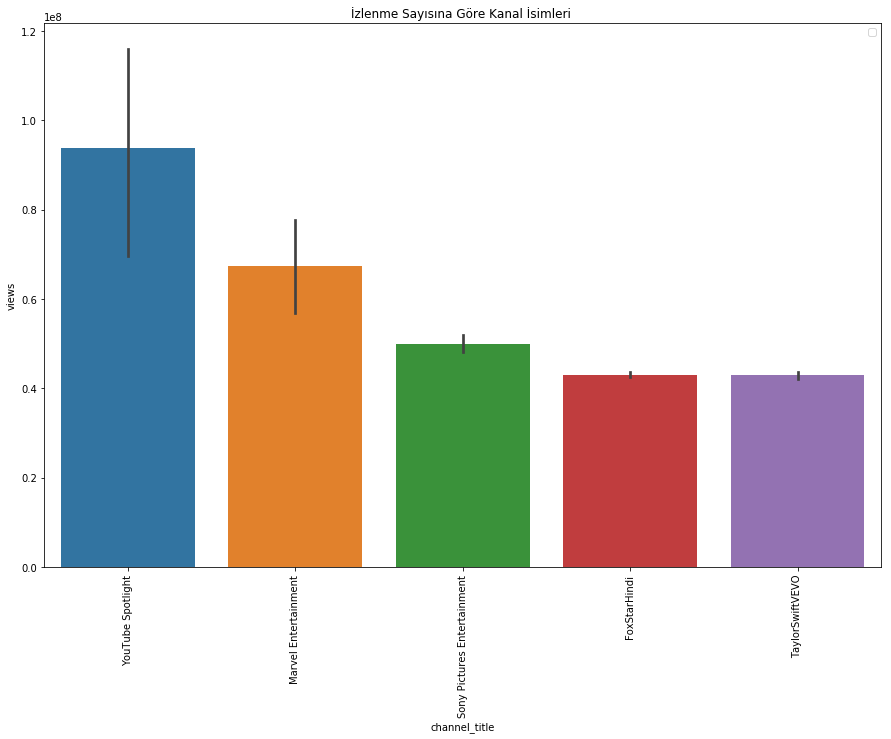

In [12]:
new_index = ın['views'].sort_values(ascending = False).index.values
sorted_data = ın.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(30) , y = sorted_data['views'].head(30),data = ın)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('İzlenme Sayısına Göre Kanal İsimleri ')
plt.show()